<a href="https://colab.research.google.com/github/amanS2206/Stock-price-predition-of-Apple-Inc./blob/main/Stock_Market_Prediction_of_Apple_Inc_using_LSTM_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# get the data
df = web.DataReader('AAPL', data_source = 'yahoo' , start='2012-01-01', end='2019-12-17')
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


In [6]:
# get the number of rows and columns
df.shape

(2003, 6)

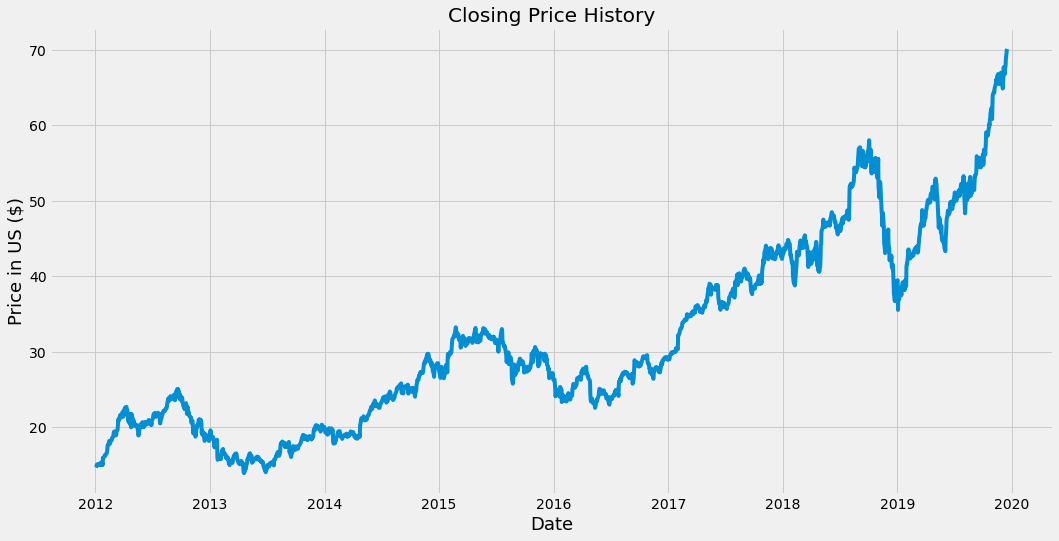

In [9]:
# visualize the closing history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price in US ($)', fontsize = 18)
plt.show()

In [10]:
# create the dataframe with only the 'close price' columns
data = df.filter(['Close'])
# convert the dataframe in to numpy array
dataset = data.values

# get the number of rows to train the modal

training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1603

In [12]:
# scale the data
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [24]:
# create the training dataset
# create the scaled training dataset
train_data = scaled_data[0: training_data_len, :]
# split the dataset in to x_train and y_train dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i,0])

In [25]:
# convert the x_train and y_train in to numpy array
x_train, y_train = np.array(x_train) , np.array(y_train)


In [27]:
# reshape the data
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape


(1543, 60, 1)

In [28]:
# build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences= True , input_shape=(x_train.shape[1] , 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
# compile the model
model.compile(optimizer='adam' , loss='mean_squared_error')

In [31]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 32s 21ms/step - loss: 6.5089e-04


In [34]:
# create the testing dataset
# create the new array containing scaled values form 1543 to 2003
test_data = scaled_data[training_data_len - 60 : , :]
# create the dataset x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 :i,0])

In [35]:
# convert the data into numpy array
x_test = np.array(x_test)

In [37]:
# reshape the data
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , 1))

In [38]:
# get the models predicted price and values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [40]:
# get the root mean squared error(RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

0.20449926376342772

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


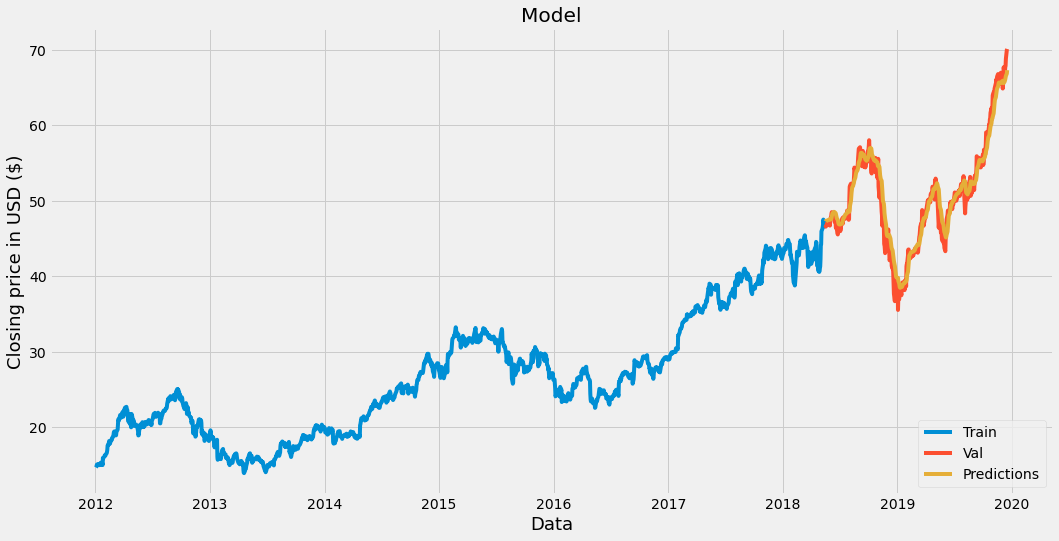

In [45]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
# visualize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data' , fontsize=18)
plt.ylabel('Closing price in USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train', 'Val' , 'Predictions'], loc='lower right')
plt.show()

In [46]:
# show the actual and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.271843
2018-05-18,46.577499,47.344105
2018-05-21,46.907501,47.352882
2018-05-22,46.790001,47.371334
2018-05-23,47.090000,47.375736
...,...,...
2019-12-11,67.692497,66.080948
2019-12-12,67.864998,66.295685
2019-12-13,68.787498,66.523232


In [49]:
# get the quote
apple_quote = web.DataReader('AAPL' , data_source='yahoo' , start = '2012-01-01', end='2012-12-17')
# create the new dataframe 
new_df = apple_quote.filter(['Close'])
# get the last 60 days price and convert dataframe in to the array

last_60_days = new_df[-60:].values
# scale the data
last_60_days_scaled = scaler.transform(last_60_days)
# create an empty list
x_test = []
# get the last 60 days data
x_test.append(last_60_days_scaled)
# convert the scaled data into numpy array
x_test = np.array(x_test)
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0] , x_test.shape[1],1))
# get the predicted price
pred_price = model.predict(x_test)
# undo the scalling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[19.352188]]


In [50]:
apple_quote2 = web.DataReader('AAPL' , data_source='yahoo' , start = '2012-12-18', end='2012-12-18')
print(apple_quote2['Close'])

Date
2012-12-18    19.067858
Name: Close, dtype: float64
